In [48]:
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [49]:
import torch
import torch.nn as nn

In [50]:
import sys

In [51]:
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [52]:
import torch
import torchvision
import torchvision.transforms as transforms

In [61]:
batch_size = 20
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize(平均, 偏差)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [62]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [63]:
%matplotlib inline

<class 'torch.utils.data.dataloader.DataLoader'>


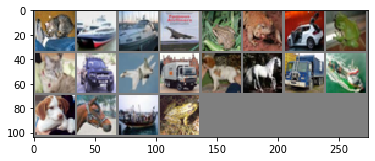

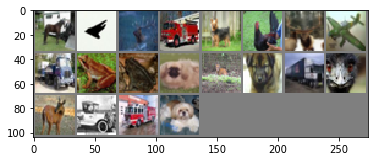

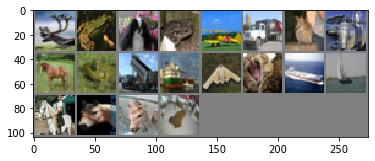

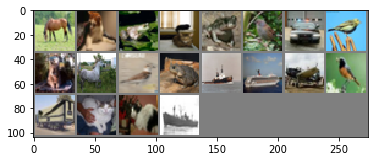

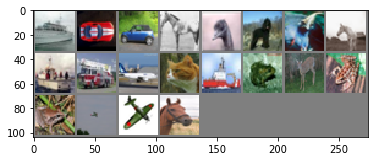

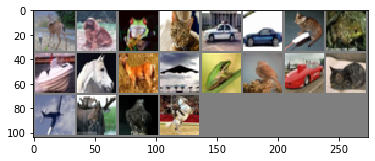

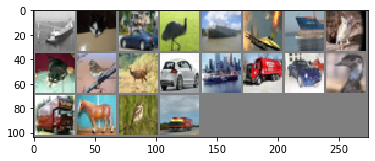

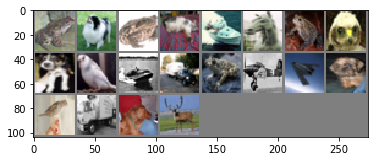

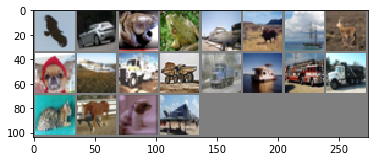

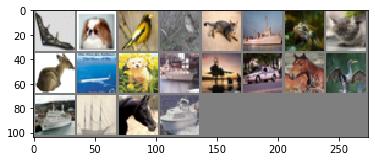

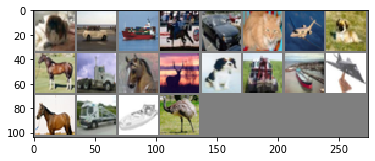

In [64]:
import matplotlib.pyplot as plt
import numpy as np
# Notebook形式の場合画像を表示させるのに必要

def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 訓練データをランダムに取得
# images, labels = trainloader

# 画像の表示
print(type(trainloader))
for i, (images, label) in enumerate(testloader):
    imshow(torchvision.utils.make_grid(images))
    if i == 10:
        break

In [65]:
import torch.nn as nn
import torch.nn.functional as f
class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 1000)
        self.fc2 = nn.Linear(1000, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        
        return f.log_softmax(x, dim=1)

In [69]:
num_epoch = 20
history = {
    'train_loss':[],
    'test_loss':[],
    'test_acc':[]
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = LinearNet().to(device)

In [70]:
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [71]:
for i_epoch in range(num_epoch):
    loss = None
    net.train(True)
    
    for i, (data, target) in enumerate(trainloader):
        data = data.view(-1, 3*32*32).to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
                print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(i_epoch+1, (i+1)*batch_size, loss.item()))
    
    history['train_loss'].append(loss)
    
    net.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in testloader:
            data = data.view(-1, 3*32*32)
            data = data.to(device)
            target = target.to(device)
            
            output = net(data)
            test_loss += f.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= 10000
    print('Test loss (avg): {}, Accuracy: {}'.format(test_loss, correct / 10000))
    
    history['test_loss'].append(test_loss)
    history['test_acc'].append(correct / 10000)

Training log: 1 epoch (20 / 60000 train. data). Loss: 2.302175521850586
Training log: 1 epoch (220 / 60000 train. data). Loss: 2.816162586212158
Training log: 1 epoch (420 / 60000 train. data). Loss: 2.252241373062134
Training log: 1 epoch (620 / 60000 train. data). Loss: 2.2289326190948486
Training log: 1 epoch (820 / 60000 train. data). Loss: 1.8109573125839233
Training log: 1 epoch (1020 / 60000 train. data). Loss: 2.056046724319458
Training log: 1 epoch (1220 / 60000 train. data). Loss: 1.7684485912322998
Training log: 1 epoch (1420 / 60000 train. data). Loss: 1.8684661388397217
Training log: 1 epoch (1620 / 60000 train. data). Loss: 2.075033187866211
Training log: 1 epoch (1820 / 60000 train. data). Loss: 2.389941692352295
Training log: 1 epoch (2020 / 60000 train. data). Loss: 2.1796517372131348
Training log: 1 epoch (2220 / 60000 train. data). Loss: 1.8521925210952759
Training log: 1 epoch (2420 / 60000 train. data). Loss: 1.8132082223892212
Training log: 1 epoch (2620 / 60000 t

Training log: 1 epoch (22420 / 60000 train. data). Loss: 1.7324512004852295
Training log: 1 epoch (22620 / 60000 train. data). Loss: 1.5457725524902344
Training log: 1 epoch (22820 / 60000 train. data). Loss: 1.3803848028182983
Training log: 1 epoch (23020 / 60000 train. data). Loss: 1.634103536605835
Training log: 1 epoch (23220 / 60000 train. data). Loss: 1.8173539638519287
Training log: 1 epoch (23420 / 60000 train. data). Loss: 1.771287202835083
Training log: 1 epoch (23620 / 60000 train. data). Loss: 1.7061097621917725
Training log: 1 epoch (23820 / 60000 train. data). Loss: 1.7712453603744507
Training log: 1 epoch (24020 / 60000 train. data). Loss: 1.4883277416229248
Training log: 1 epoch (24220 / 60000 train. data). Loss: 1.3595634698867798
Training log: 1 epoch (24420 / 60000 train. data). Loss: 1.9885456562042236
Training log: 1 epoch (24620 / 60000 train. data). Loss: 1.912164330482483
Training log: 1 epoch (24820 / 60000 train. data). Loss: 1.7418043613433838
Training log: 1

Training log: 1 epoch (45020 / 60000 train. data). Loss: 1.9055068492889404
Training log: 1 epoch (45220 / 60000 train. data). Loss: 1.8709309101104736
Training log: 1 epoch (45420 / 60000 train. data). Loss: 1.5006523132324219
Training log: 1 epoch (45620 / 60000 train. data). Loss: 1.9331188201904297
Training log: 1 epoch (45820 / 60000 train. data). Loss: 1.4079108238220215
Training log: 1 epoch (46020 / 60000 train. data). Loss: 1.9397497177124023
Training log: 1 epoch (46220 / 60000 train. data). Loss: 2.250924587249756
Training log: 1 epoch (46420 / 60000 train. data). Loss: 1.7153581380844116
Training log: 1 epoch (46620 / 60000 train. data). Loss: 1.6296541690826416
Training log: 1 epoch (46820 / 60000 train. data). Loss: 1.527714490890503
Training log: 1 epoch (47020 / 60000 train. data). Loss: 1.8686606884002686
Training log: 1 epoch (47220 / 60000 train. data). Loss: 1.337710976600647
Training log: 1 epoch (47420 / 60000 train. data). Loss: 1.9391543865203857
Training log: 1

Training log: 2 epoch (17820 / 60000 train. data). Loss: 2.27724552154541
Training log: 2 epoch (18020 / 60000 train. data). Loss: 1.3550766706466675
Training log: 2 epoch (18220 / 60000 train. data). Loss: 1.4654772281646729
Training log: 2 epoch (18420 / 60000 train. data). Loss: 1.7606925964355469
Training log: 2 epoch (18620 / 60000 train. data). Loss: 2.0673165321350098
Training log: 2 epoch (18820 / 60000 train. data). Loss: 1.641807198524475
Training log: 2 epoch (19020 / 60000 train. data). Loss: 1.6276466846466064
Training log: 2 epoch (19220 / 60000 train. data). Loss: 1.7112442255020142
Training log: 2 epoch (19420 / 60000 train. data). Loss: 1.5373936891555786
Training log: 2 epoch (19620 / 60000 train. data). Loss: 1.6710727214813232
Training log: 2 epoch (19820 / 60000 train. data). Loss: 2.370427131652832
Training log: 2 epoch (20020 / 60000 train. data). Loss: 1.3497958183288574
Training log: 2 epoch (20220 / 60000 train. data). Loss: 1.5547373294830322
Training log: 2 

Training log: 2 epoch (40020 / 60000 train. data). Loss: 1.7680070400238037
Training log: 2 epoch (40220 / 60000 train. data). Loss: 1.9690024852752686
Training log: 2 epoch (40420 / 60000 train. data). Loss: 1.6518099308013916
Training log: 2 epoch (40620 / 60000 train. data). Loss: 1.7274398803710938
Training log: 2 epoch (40820 / 60000 train. data). Loss: 1.5010684728622437
Training log: 2 epoch (41020 / 60000 train. data). Loss: 1.6199204921722412
Training log: 2 epoch (41220 / 60000 train. data). Loss: 1.5605475902557373
Training log: 2 epoch (41420 / 60000 train. data). Loss: 1.874863624572754
Training log: 2 epoch (41620 / 60000 train. data). Loss: 1.6157658100128174
Training log: 2 epoch (41820 / 60000 train. data). Loss: 1.4589182138442993
Training log: 2 epoch (42020 / 60000 train. data). Loss: 1.532261848449707
Training log: 2 epoch (42220 / 60000 train. data). Loss: 1.9099292755126953
Training log: 2 epoch (42420 / 60000 train. data). Loss: 1.5478966236114502
Training log: 

Training log: 3 epoch (11820 / 60000 train. data). Loss: 2.0928845405578613
Training log: 3 epoch (12020 / 60000 train. data). Loss: 1.7557837963104248
Training log: 3 epoch (12220 / 60000 train. data). Loss: 1.345314621925354
Training log: 3 epoch (12420 / 60000 train. data). Loss: 1.588836908340454
Training log: 3 epoch (12620 / 60000 train. data). Loss: 1.5581557750701904
Training log: 3 epoch (12820 / 60000 train. data). Loss: 1.6649904251098633
Training log: 3 epoch (13020 / 60000 train. data). Loss: 1.761423110961914
Training log: 3 epoch (13220 / 60000 train. data). Loss: 1.0910203456878662
Training log: 3 epoch (13420 / 60000 train. data). Loss: 1.3681743144989014
Training log: 3 epoch (13620 / 60000 train. data). Loss: 1.8632227182388306
Training log: 3 epoch (13820 / 60000 train. data). Loss: 1.3142950534820557
Training log: 3 epoch (14020 / 60000 train. data). Loss: 1.817992925643921
Training log: 3 epoch (14220 / 60000 train. data). Loss: 1.0482412576675415
Training log: 3 

Training log: 3 epoch (33820 / 60000 train. data). Loss: 1.602190613746643
Training log: 3 epoch (34020 / 60000 train. data). Loss: 1.8304240703582764
Training log: 3 epoch (34220 / 60000 train. data). Loss: 1.7799984216690063
Training log: 3 epoch (34420 / 60000 train. data). Loss: 1.6891472339630127
Training log: 3 epoch (34620 / 60000 train. data). Loss: 1.2318931818008423
Training log: 3 epoch (34820 / 60000 train. data). Loss: 1.3434470891952515
Training log: 3 epoch (35020 / 60000 train. data). Loss: 1.149577021598816
Training log: 3 epoch (35220 / 60000 train. data). Loss: 1.6428954601287842
Training log: 3 epoch (35420 / 60000 train. data). Loss: 2.3811116218566895
Training log: 3 epoch (35620 / 60000 train. data). Loss: 1.53654944896698
Training log: 3 epoch (35820 / 60000 train. data). Loss: 1.831416368484497
Training log: 3 epoch (36020 / 60000 train. data). Loss: 1.8102878332138062
Training log: 3 epoch (36220 / 60000 train. data). Loss: 1.3575879335403442
Training log: 3 e

Training log: 4 epoch (5820 / 60000 train. data). Loss: 1.253517746925354
Training log: 4 epoch (6020 / 60000 train. data). Loss: 1.2992041110992432
Training log: 4 epoch (6220 / 60000 train. data). Loss: 1.6029666662216187
Training log: 4 epoch (6420 / 60000 train. data). Loss: 1.310834288597107
Training log: 4 epoch (6620 / 60000 train. data). Loss: 1.0731656551361084
Training log: 4 epoch (6820 / 60000 train. data). Loss: 1.5674934387207031
Training log: 4 epoch (7020 / 60000 train. data). Loss: 1.3718321323394775
Training log: 4 epoch (7220 / 60000 train. data). Loss: 1.518317461013794
Training log: 4 epoch (7420 / 60000 train. data). Loss: 1.7380836009979248
Training log: 4 epoch (7620 / 60000 train. data). Loss: 1.3326408863067627
Training log: 4 epoch (7820 / 60000 train. data). Loss: 1.757826566696167
Training log: 4 epoch (8020 / 60000 train. data). Loss: 2.0441536903381348
Training log: 4 epoch (8220 / 60000 train. data). Loss: 1.7194340229034424
Training log: 4 epoch (8420 /

Training log: 4 epoch (27620 / 60000 train. data). Loss: 1.032774567604065
Training log: 4 epoch (27820 / 60000 train. data). Loss: 0.9529553651809692
Training log: 4 epoch (28020 / 60000 train. data). Loss: 1.414861798286438
Training log: 4 epoch (28220 / 60000 train. data). Loss: 1.6855169534683228
Training log: 4 epoch (28420 / 60000 train. data). Loss: 1.7170518636703491
Training log: 4 epoch (28620 / 60000 train. data). Loss: 1.5471209287643433
Training log: 4 epoch (28820 / 60000 train. data). Loss: 1.300081729888916
Training log: 4 epoch (29020 / 60000 train. data). Loss: 1.5742411613464355
Training log: 4 epoch (29220 / 60000 train. data). Loss: 1.0825309753417969
Training log: 4 epoch (29420 / 60000 train. data). Loss: 1.5244934558868408
Training log: 4 epoch (29620 / 60000 train. data). Loss: 1.4956389665603638
Training log: 4 epoch (29820 / 60000 train. data). Loss: 1.4901303052902222
Training log: 4 epoch (30020 / 60000 train. data). Loss: 2.1051254272460938
Training log: 4

Test loss (avg): 1.601462968826294, Accuracy: 0.4436
Training log: 5 epoch (20 / 60000 train. data). Loss: 0.8945981860160828
Training log: 5 epoch (220 / 60000 train. data). Loss: 1.4527900218963623
Training log: 5 epoch (420 / 60000 train. data). Loss: 1.4040071964263916
Training log: 5 epoch (620 / 60000 train. data). Loss: 1.643750548362732
Training log: 5 epoch (820 / 60000 train. data). Loss: 0.7491588592529297
Training log: 5 epoch (1020 / 60000 train. data). Loss: 1.055981159210205
Training log: 5 epoch (1220 / 60000 train. data). Loss: 1.7207342386245728
Training log: 5 epoch (1420 / 60000 train. data). Loss: 1.0472495555877686
Training log: 5 epoch (1620 / 60000 train. data). Loss: 1.0889030694961548
Training log: 5 epoch (1820 / 60000 train. data). Loss: 1.4067835807800293
Training log: 5 epoch (2020 / 60000 train. data). Loss: 1.2022572755813599
Training log: 5 epoch (2220 / 60000 train. data). Loss: 2.108177900314331
Training log: 5 epoch (2420 / 60000 train. data). Loss: 

Training log: 5 epoch (22820 / 60000 train. data). Loss: 1.15542471408844
Training log: 5 epoch (23020 / 60000 train. data). Loss: 1.7411836385726929
Training log: 5 epoch (23220 / 60000 train. data). Loss: 1.1738111972808838
Training log: 5 epoch (23420 / 60000 train. data). Loss: 1.8630088567733765
Training log: 5 epoch (23620 / 60000 train. data). Loss: 1.1362279653549194
Training log: 5 epoch (23820 / 60000 train. data). Loss: 0.8226577639579773
Training log: 5 epoch (24020 / 60000 train. data). Loss: 1.4330785274505615
Training log: 5 epoch (24220 / 60000 train. data). Loss: 1.6029243469238281
Training log: 5 epoch (24420 / 60000 train. data). Loss: 1.6240040063858032
Training log: 5 epoch (24620 / 60000 train. data). Loss: 1.196895956993103
Training log: 5 epoch (24820 / 60000 train. data). Loss: 1.6688032150268555
Training log: 5 epoch (25020 / 60000 train. data). Loss: 1.0621607303619385
Training log: 5 epoch (25220 / 60000 train. data). Loss: 1.6287832260131836
Training log: 5

Training log: 5 epoch (45020 / 60000 train. data). Loss: 1.7064895629882812
Training log: 5 epoch (45220 / 60000 train. data). Loss: 1.2702605724334717
Training log: 5 epoch (45420 / 60000 train. data). Loss: 1.7940235137939453
Training log: 5 epoch (45620 / 60000 train. data). Loss: 1.366559624671936
Training log: 5 epoch (45820 / 60000 train. data). Loss: 1.4429444074630737
Training log: 5 epoch (46020 / 60000 train. data). Loss: 1.2759389877319336
Training log: 5 epoch (46220 / 60000 train. data). Loss: 2.173506259918213
Training log: 5 epoch (46420 / 60000 train. data). Loss: 1.464512586593628
Training log: 5 epoch (46620 / 60000 train. data). Loss: 1.149548053741455
Training log: 5 epoch (46820 / 60000 train. data). Loss: 1.1622861623764038
Training log: 5 epoch (47020 / 60000 train. data). Loss: 1.4845397472381592
Training log: 5 epoch (47220 / 60000 train. data). Loss: 0.9633037447929382
Training log: 5 epoch (47420 / 60000 train. data). Loss: 1.1233429908752441
Training log: 5 

Training log: 6 epoch (17820 / 60000 train. data). Loss: 1.140282154083252
Training log: 6 epoch (18020 / 60000 train. data). Loss: 1.5932073593139648
Training log: 6 epoch (18220 / 60000 train. data). Loss: 0.9567633867263794
Training log: 6 epoch (18420 / 60000 train. data). Loss: 0.9663110971450806
Training log: 6 epoch (18620 / 60000 train. data). Loss: 1.21238112449646
Training log: 6 epoch (18820 / 60000 train. data). Loss: 1.5308301448822021
Training log: 6 epoch (19020 / 60000 train. data). Loss: 1.2204285860061646
Training log: 6 epoch (19220 / 60000 train. data). Loss: 1.4705712795257568
Training log: 6 epoch (19420 / 60000 train. data). Loss: 1.4045774936676025
Training log: 6 epoch (19620 / 60000 train. data). Loss: 1.2882428169250488
Training log: 6 epoch (19820 / 60000 train. data). Loss: 1.756007432937622
Training log: 6 epoch (20020 / 60000 train. data). Loss: 1.1894055604934692
Training log: 6 epoch (20220 / 60000 train. data). Loss: 1.2573699951171875
Training log: 6 

Training log: 6 epoch (40420 / 60000 train. data). Loss: 1.7892482280731201
Training log: 6 epoch (40620 / 60000 train. data). Loss: 1.420637607574463
Training log: 6 epoch (40820 / 60000 train. data). Loss: 1.781473159790039
Training log: 6 epoch (41020 / 60000 train. data). Loss: 1.2379395961761475
Training log: 6 epoch (41220 / 60000 train. data). Loss: 1.2624964714050293
Training log: 6 epoch (41420 / 60000 train. data). Loss: 1.4539836645126343
Training log: 6 epoch (41620 / 60000 train. data). Loss: 1.318626880645752
Training log: 6 epoch (41820 / 60000 train. data). Loss: 1.513261079788208
Training log: 6 epoch (42020 / 60000 train. data). Loss: 1.1648995876312256
Training log: 6 epoch (42220 / 60000 train. data). Loss: 1.2105393409729004
Training log: 6 epoch (42420 / 60000 train. data). Loss: 1.2582422494888306
Training log: 6 epoch (42620 / 60000 train. data). Loss: 1.6915031671524048
Training log: 6 epoch (42820 / 60000 train. data). Loss: 1.2688343524932861
Training log: 6 

Training log: 7 epoch (12220 / 60000 train. data). Loss: 1.4850102663040161
Training log: 7 epoch (12420 / 60000 train. data). Loss: 1.1644015312194824
Training log: 7 epoch (12620 / 60000 train. data). Loss: 1.768398642539978
Training log: 7 epoch (12820 / 60000 train. data). Loss: 1.243059515953064
Training log: 7 epoch (13020 / 60000 train. data). Loss: 1.6547625064849854
Training log: 7 epoch (13220 / 60000 train. data). Loss: 1.5465075969696045
Training log: 7 epoch (13420 / 60000 train. data). Loss: 1.3357322216033936
Training log: 7 epoch (13620 / 60000 train. data). Loss: 1.4469289779663086
Training log: 7 epoch (13820 / 60000 train. data). Loss: 1.2391765117645264
Training log: 7 epoch (14020 / 60000 train. data). Loss: 1.1747833490371704
Training log: 7 epoch (14220 / 60000 train. data). Loss: 1.4706982374191284
Training log: 7 epoch (14420 / 60000 train. data). Loss: 1.0020438432693481
Training log: 7 epoch (14620 / 60000 train. data). Loss: 1.360234022140503
Training log: 7

Training log: 7 epoch (34620 / 60000 train. data). Loss: 2.0039210319519043
Training log: 7 epoch (34820 / 60000 train. data). Loss: 1.6591755151748657
Training log: 7 epoch (35020 / 60000 train. data). Loss: 1.0273514986038208
Training log: 7 epoch (35220 / 60000 train. data). Loss: 1.6099334955215454
Training log: 7 epoch (35420 / 60000 train. data). Loss: 1.3152296543121338
Training log: 7 epoch (35620 / 60000 train. data). Loss: 1.065926194190979
Training log: 7 epoch (35820 / 60000 train. data). Loss: 0.970079779624939
Training log: 7 epoch (36020 / 60000 train. data). Loss: 1.2639904022216797
Training log: 7 epoch (36220 / 60000 train. data). Loss: 1.1409800052642822
Training log: 7 epoch (36420 / 60000 train. data). Loss: 1.3620531558990479
Training log: 7 epoch (36620 / 60000 train. data). Loss: 1.3213294744491577
Training log: 7 epoch (36820 / 60000 train. data). Loss: 1.154219150543213
Training log: 7 epoch (37020 / 60000 train. data). Loss: 1.0541176795959473
Training log: 7

Training log: 8 epoch (7220 / 60000 train. data). Loss: 1.1219122409820557
Training log: 8 epoch (7420 / 60000 train. data). Loss: 1.00042724609375
Training log: 8 epoch (7620 / 60000 train. data). Loss: 1.3897627592086792
Training log: 8 epoch (7820 / 60000 train. data). Loss: 1.4490573406219482
Training log: 8 epoch (8020 / 60000 train. data). Loss: 0.748735785484314
Training log: 8 epoch (8220 / 60000 train. data). Loss: 1.0951571464538574
Training log: 8 epoch (8420 / 60000 train. data). Loss: 1.3647711277008057
Training log: 8 epoch (8620 / 60000 train. data). Loss: 1.4418761730194092
Training log: 8 epoch (8820 / 60000 train. data). Loss: 1.1877176761627197
Training log: 8 epoch (9020 / 60000 train. data). Loss: 1.4291455745697021
Training log: 8 epoch (9220 / 60000 train. data). Loss: 1.0565145015716553
Training log: 8 epoch (9420 / 60000 train. data). Loss: 1.2279257774353027
Training log: 8 epoch (9620 / 60000 train. data). Loss: 1.2479729652404785
Training log: 8 epoch (9820 

Training log: 8 epoch (29220 / 60000 train. data). Loss: 0.9428151845932007
Training log: 8 epoch (29420 / 60000 train. data). Loss: 1.3102298974990845
Training log: 8 epoch (29620 / 60000 train. data). Loss: 1.0724397897720337
Training log: 8 epoch (29820 / 60000 train. data). Loss: 1.344269037246704
Training log: 8 epoch (30020 / 60000 train. data). Loss: 1.363149881362915
Training log: 8 epoch (30220 / 60000 train. data). Loss: 1.1576234102249146
Training log: 8 epoch (30420 / 60000 train. data). Loss: 1.809383749961853
Training log: 8 epoch (30620 / 60000 train. data). Loss: 1.2936837673187256
Training log: 8 epoch (30820 / 60000 train. data). Loss: 1.4684131145477295
Training log: 8 epoch (31020 / 60000 train. data). Loss: 1.2795332670211792
Training log: 8 epoch (31220 / 60000 train. data). Loss: 1.2430907487869263
Training log: 8 epoch (31420 / 60000 train. data). Loss: 1.3097290992736816
Training log: 8 epoch (31620 / 60000 train. data). Loss: 1.6666929721832275
Training log: 8

Training log: 9 epoch (1020 / 60000 train. data). Loss: 1.3030792474746704
Training log: 9 epoch (1220 / 60000 train. data). Loss: 1.353053331375122
Training log: 9 epoch (1420 / 60000 train. data). Loss: 1.3978474140167236
Training log: 9 epoch (1620 / 60000 train. data). Loss: 1.173657774925232
Training log: 9 epoch (1820 / 60000 train. data). Loss: 1.7141450643539429
Training log: 9 epoch (2020 / 60000 train. data). Loss: 1.555908203125
Training log: 9 epoch (2220 / 60000 train. data). Loss: 1.2993190288543701
Training log: 9 epoch (2420 / 60000 train. data). Loss: 1.1289548873901367
Training log: 9 epoch (2620 / 60000 train. data). Loss: 1.2832391262054443
Training log: 9 epoch (2820 / 60000 train. data). Loss: 1.1052922010421753
Training log: 9 epoch (3020 / 60000 train. data). Loss: 0.8322274088859558
Training log: 9 epoch (3220 / 60000 train. data). Loss: 1.3367130756378174
Training log: 9 epoch (3420 / 60000 train. data). Loss: 1.0661474466323853
Training log: 9 epoch (3620 / 6

Training log: 9 epoch (23220 / 60000 train. data). Loss: 1.1082732677459717
Training log: 9 epoch (23420 / 60000 train. data). Loss: 0.9031521677970886
Training log: 9 epoch (23620 / 60000 train. data). Loss: 0.9222941398620605
Training log: 9 epoch (23820 / 60000 train. data). Loss: 1.2102869749069214
Training log: 9 epoch (24020 / 60000 train. data). Loss: 1.1551215648651123
Training log: 9 epoch (24220 / 60000 train. data). Loss: 1.7992578744888306
Training log: 9 epoch (24420 / 60000 train. data). Loss: 2.1173081398010254
Training log: 9 epoch (24620 / 60000 train. data). Loss: 1.239018201828003
Training log: 9 epoch (24820 / 60000 train. data). Loss: 1.5942280292510986
Training log: 9 epoch (25020 / 60000 train. data). Loss: 1.177260398864746
Training log: 9 epoch (25220 / 60000 train. data). Loss: 1.739414930343628
Training log: 9 epoch (25420 / 60000 train. data). Loss: 1.4153149127960205
Training log: 9 epoch (25620 / 60000 train. data). Loss: 1.3993217945098877
Training log: 9

Training log: 9 epoch (45620 / 60000 train. data). Loss: 1.2320244312286377
Training log: 9 epoch (45820 / 60000 train. data). Loss: 2.0614542961120605
Training log: 9 epoch (46020 / 60000 train. data). Loss: 1.4689123630523682
Training log: 9 epoch (46220 / 60000 train. data). Loss: 1.5067449808120728
Training log: 9 epoch (46420 / 60000 train. data). Loss: 1.2638776302337646
Training log: 9 epoch (46620 / 60000 train. data). Loss: 1.0519486665725708
Training log: 9 epoch (46820 / 60000 train. data). Loss: 1.455159306526184
Training log: 9 epoch (47020 / 60000 train. data). Loss: 1.225354790687561
Training log: 9 epoch (47220 / 60000 train. data). Loss: 1.5412850379943848
Training log: 9 epoch (47420 / 60000 train. data). Loss: 0.9321635961532593
Training log: 9 epoch (47620 / 60000 train. data). Loss: 1.219565749168396
Training log: 9 epoch (47820 / 60000 train. data). Loss: 1.2814117670059204
Training log: 9 epoch (48020 / 60000 train. data). Loss: 1.156883716583252
Training log: 9 

Training log: 10 epoch (17620 / 60000 train. data). Loss: 0.7396990060806274
Training log: 10 epoch (17820 / 60000 train. data). Loss: 1.2443459033966064
Training log: 10 epoch (18020 / 60000 train. data). Loss: 1.572599172592163
Training log: 10 epoch (18220 / 60000 train. data). Loss: 1.2296113967895508
Training log: 10 epoch (18420 / 60000 train. data). Loss: 1.0966806411743164
Training log: 10 epoch (18620 / 60000 train. data). Loss: 1.0692615509033203
Training log: 10 epoch (18820 / 60000 train. data). Loss: 1.5570778846740723
Training log: 10 epoch (19020 / 60000 train. data). Loss: 0.6114670634269714
Training log: 10 epoch (19220 / 60000 train. data). Loss: 1.0652544498443604
Training log: 10 epoch (19420 / 60000 train. data). Loss: 1.1842877864837646
Training log: 10 epoch (19620 / 60000 train. data). Loss: 1.1896389722824097
Training log: 10 epoch (19820 / 60000 train. data). Loss: 1.208490252494812
Training log: 10 epoch (20020 / 60000 train. data). Loss: 1.2019553184509277
T

Training log: 10 epoch (39820 / 60000 train. data). Loss: 0.9899123907089233
Training log: 10 epoch (40020 / 60000 train. data). Loss: 1.1311733722686768
Training log: 10 epoch (40220 / 60000 train. data). Loss: 1.6034024953842163
Training log: 10 epoch (40420 / 60000 train. data). Loss: 1.0657731294631958
Training log: 10 epoch (40620 / 60000 train. data). Loss: 1.1445770263671875
Training log: 10 epoch (40820 / 60000 train. data). Loss: 1.5231945514678955
Training log: 10 epoch (41020 / 60000 train. data). Loss: 1.1090384721755981
Training log: 10 epoch (41220 / 60000 train. data). Loss: 1.8742862939834595
Training log: 10 epoch (41420 / 60000 train. data). Loss: 2.0487444400787354
Training log: 10 epoch (41620 / 60000 train. data). Loss: 0.855085015296936
Training log: 10 epoch (41820 / 60000 train. data). Loss: 1.444536805152893
Training log: 10 epoch (42020 / 60000 train. data). Loss: 1.4839454889297485
Training log: 10 epoch (42220 / 60000 train. data). Loss: 1.298811674118042
Tr

Training log: 11 epoch (12020 / 60000 train. data). Loss: 0.8638795614242554
Training log: 11 epoch (12220 / 60000 train. data). Loss: 1.0179790258407593
Training log: 11 epoch (12420 / 60000 train. data). Loss: 1.3379697799682617
Training log: 11 epoch (12620 / 60000 train. data). Loss: 1.0092982053756714
Training log: 11 epoch (12820 / 60000 train. data). Loss: 1.019554853439331
Training log: 11 epoch (13020 / 60000 train. data). Loss: 0.7434560060501099
Training log: 11 epoch (13220 / 60000 train. data). Loss: 0.965155303478241
Training log: 11 epoch (13420 / 60000 train. data). Loss: 1.0499389171600342
Training log: 11 epoch (13620 / 60000 train. data). Loss: 1.0406615734100342
Training log: 11 epoch (13820 / 60000 train. data). Loss: 1.248131513595581
Training log: 11 epoch (14020 / 60000 train. data). Loss: 0.9985589981079102
Training log: 11 epoch (14220 / 60000 train. data). Loss: 0.8330620527267456
Training log: 11 epoch (14420 / 60000 train. data). Loss: 1.0320125818252563
Tr

Training log: 11 epoch (33620 / 60000 train. data). Loss: 1.090178370475769
Training log: 11 epoch (33820 / 60000 train. data). Loss: 1.166894793510437
Training log: 11 epoch (34020 / 60000 train. data). Loss: 1.153833270072937
Training log: 11 epoch (34220 / 60000 train. data). Loss: 1.6056684255599976
Training log: 11 epoch (34420 / 60000 train. data). Loss: 1.4538161754608154
Training log: 11 epoch (34620 / 60000 train. data). Loss: 1.4547020196914673
Training log: 11 epoch (34820 / 60000 train. data). Loss: 1.29427170753479
Training log: 11 epoch (35020 / 60000 train. data). Loss: 1.5483248233795166
Training log: 11 epoch (35220 / 60000 train. data). Loss: 0.8886526823043823
Training log: 11 epoch (35420 / 60000 train. data). Loss: 1.2930667400360107
Training log: 11 epoch (35620 / 60000 train. data). Loss: 1.1140985488891602
Training log: 11 epoch (35820 / 60000 train. data). Loss: 1.3049789667129517
Training log: 11 epoch (36020 / 60000 train. data). Loss: 1.629754662513733
Train

Training log: 12 epoch (6020 / 60000 train. data). Loss: 1.6309744119644165
Training log: 12 epoch (6220 / 60000 train. data). Loss: 1.092052698135376
Training log: 12 epoch (6420 / 60000 train. data). Loss: 0.8238958120346069
Training log: 12 epoch (6620 / 60000 train. data). Loss: 1.2797136306762695
Training log: 12 epoch (6820 / 60000 train. data). Loss: 0.9653941988945007
Training log: 12 epoch (7020 / 60000 train. data). Loss: 1.0851678848266602
Training log: 12 epoch (7220 / 60000 train. data). Loss: 0.5212000012397766
Training log: 12 epoch (7420 / 60000 train. data). Loss: 1.0890048742294312
Training log: 12 epoch (7620 / 60000 train. data). Loss: 1.3574641942977905
Training log: 12 epoch (7820 / 60000 train. data). Loss: 1.3984838724136353
Training log: 12 epoch (8020 / 60000 train. data). Loss: 0.9980518221855164
Training log: 12 epoch (8220 / 60000 train. data). Loss: 0.8909131288528442
Training log: 12 epoch (8420 / 60000 train. data). Loss: 0.6947965621948242
Training log:

Training log: 12 epoch (27620 / 60000 train. data). Loss: 1.2022018432617188
Training log: 12 epoch (27820 / 60000 train. data). Loss: 1.3361432552337646
Training log: 12 epoch (28020 / 60000 train. data). Loss: 0.981131911277771
Training log: 12 epoch (28220 / 60000 train. data). Loss: 1.0399153232574463
Training log: 12 epoch (28420 / 60000 train. data). Loss: 0.917879581451416
Training log: 12 epoch (28620 / 60000 train. data). Loss: 1.0544755458831787
Training log: 12 epoch (28820 / 60000 train. data). Loss: 0.6978362202644348
Training log: 12 epoch (29020 / 60000 train. data). Loss: 0.6087242960929871
Training log: 12 epoch (29220 / 60000 train. data). Loss: 1.4678590297698975
Training log: 12 epoch (29420 / 60000 train. data). Loss: 1.4758391380310059
Training log: 12 epoch (29620 / 60000 train. data). Loss: 1.4571880102157593
Training log: 12 epoch (29820 / 60000 train. data). Loss: 1.2812230587005615
Training log: 12 epoch (30020 / 60000 train. data). Loss: 1.1057751178741455
T

Test loss (avg): 1.7115333414077758, Accuracy: 0.451
Training log: 13 epoch (20 / 60000 train. data). Loss: 0.9411656260490417
Training log: 13 epoch (220 / 60000 train. data). Loss: 1.466584324836731
Training log: 13 epoch (420 / 60000 train. data). Loss: 1.1191864013671875
Training log: 13 epoch (620 / 60000 train. data). Loss: 1.0429959297180176
Training log: 13 epoch (820 / 60000 train. data). Loss: 0.9957941174507141
Training log: 13 epoch (1020 / 60000 train. data). Loss: 0.7683584690093994
Training log: 13 epoch (1220 / 60000 train. data). Loss: 1.6460773944854736
Training log: 13 epoch (1420 / 60000 train. data). Loss: 1.0744324922561646
Training log: 13 epoch (1620 / 60000 train. data). Loss: 1.1917439699172974
Training log: 13 epoch (1820 / 60000 train. data). Loss: 1.5814781188964844
Training log: 13 epoch (2020 / 60000 train. data). Loss: 1.1040091514587402
Training log: 13 epoch (2220 / 60000 train. data). Loss: 0.7952630519866943
Training log: 13 epoch (2420 / 60000 train

Training log: 13 epoch (21620 / 60000 train. data). Loss: 1.1903990507125854
Training log: 13 epoch (21820 / 60000 train. data). Loss: 1.5948899984359741
Training log: 13 epoch (22020 / 60000 train. data). Loss: 1.5058537721633911
Training log: 13 epoch (22220 / 60000 train. data). Loss: 1.5716922283172607
Training log: 13 epoch (22420 / 60000 train. data). Loss: 1.2368608713150024
Training log: 13 epoch (22620 / 60000 train. data). Loss: 1.1489068269729614
Training log: 13 epoch (22820 / 60000 train. data). Loss: 1.572263479232788
Training log: 13 epoch (23020 / 60000 train. data). Loss: 0.9189593195915222
Training log: 13 epoch (23220 / 60000 train. data). Loss: 1.0820931196212769
Training log: 13 epoch (23420 / 60000 train. data). Loss: 0.9570406675338745
Training log: 13 epoch (23620 / 60000 train. data). Loss: 1.2062783241271973
Training log: 13 epoch (23820 / 60000 train. data). Loss: 1.0374598503112793
Training log: 13 epoch (24020 / 60000 train. data). Loss: 1.7510827779769897


Training log: 13 epoch (43620 / 60000 train. data). Loss: 1.0967937707901
Training log: 13 epoch (43820 / 60000 train. data). Loss: 1.1893326044082642
Training log: 13 epoch (44020 / 60000 train. data). Loss: 1.0691572427749634
Training log: 13 epoch (44220 / 60000 train. data). Loss: 1.0964776277542114
Training log: 13 epoch (44420 / 60000 train. data). Loss: 1.2117105722427368
Training log: 13 epoch (44620 / 60000 train. data). Loss: 1.254596471786499
Training log: 13 epoch (44820 / 60000 train. data). Loss: 0.8674459457397461
Training log: 13 epoch (45020 / 60000 train. data). Loss: 1.435333490371704
Training log: 13 epoch (45220 / 60000 train. data). Loss: 1.159605860710144
Training log: 13 epoch (45420 / 60000 train. data). Loss: 0.6150440573692322
Training log: 13 epoch (45620 / 60000 train. data). Loss: 1.1762100458145142
Training log: 13 epoch (45820 / 60000 train. data). Loss: 1.06342613697052
Training log: 13 epoch (46020 / 60000 train. data). Loss: 1.1672555208206177
Trainin

Training log: 14 epoch (15620 / 60000 train. data). Loss: 1.3694714307785034
Training log: 14 epoch (15820 / 60000 train. data). Loss: 1.6696819067001343
Training log: 14 epoch (16020 / 60000 train. data). Loss: 0.8715421557426453
Training log: 14 epoch (16220 / 60000 train. data). Loss: 0.8877879977226257
Training log: 14 epoch (16420 / 60000 train. data). Loss: 0.7756945490837097
Training log: 14 epoch (16620 / 60000 train. data). Loss: 0.9212150573730469
Training log: 14 epoch (16820 / 60000 train. data). Loss: 1.4523730278015137
Training log: 14 epoch (17020 / 60000 train. data). Loss: 1.4234048128128052
Training log: 14 epoch (17220 / 60000 train. data). Loss: 1.252899408340454
Training log: 14 epoch (17420 / 60000 train. data). Loss: 1.4294610023498535
Training log: 14 epoch (17620 / 60000 train. data). Loss: 1.1998605728149414
Training log: 14 epoch (17820 / 60000 train. data). Loss: 1.532281756401062
Training log: 14 epoch (18020 / 60000 train. data). Loss: 1.0213253498077393
T

Training log: 14 epoch (37820 / 60000 train. data). Loss: 1.3716888427734375
Training log: 14 epoch (38020 / 60000 train. data). Loss: 1.4529134035110474
Training log: 14 epoch (38220 / 60000 train. data). Loss: 1.3203885555267334
Training log: 14 epoch (38420 / 60000 train. data). Loss: 1.0742851495742798
Training log: 14 epoch (38620 / 60000 train. data). Loss: 1.6871707439422607
Training log: 14 epoch (38820 / 60000 train. data). Loss: 0.9799269437789917
Training log: 14 epoch (39020 / 60000 train. data). Loss: 1.8173539638519287
Training log: 14 epoch (39220 / 60000 train. data). Loss: 1.001678228378296
Training log: 14 epoch (39420 / 60000 train. data). Loss: 0.9449092745780945
Training log: 14 epoch (39620 / 60000 train. data). Loss: 0.7093682289123535
Training log: 14 epoch (39820 / 60000 train. data). Loss: 1.1357643604278564
Training log: 14 epoch (40020 / 60000 train. data). Loss: 1.6869933605194092
Training log: 14 epoch (40220 / 60000 train. data). Loss: 1.0834102630615234


Training log: 15 epoch (9420 / 60000 train. data). Loss: 1.199448823928833
Training log: 15 epoch (9620 / 60000 train. data). Loss: 0.7916675806045532
Training log: 15 epoch (9820 / 60000 train. data). Loss: 1.0864717960357666
Training log: 15 epoch (10020 / 60000 train. data). Loss: 0.5381755232810974
Training log: 15 epoch (10220 / 60000 train. data). Loss: 0.5588557124137878
Training log: 15 epoch (10420 / 60000 train. data). Loss: 0.97581946849823
Training log: 15 epoch (10620 / 60000 train. data). Loss: 0.857291042804718
Training log: 15 epoch (10820 / 60000 train. data). Loss: 0.7908040285110474
Training log: 15 epoch (11020 / 60000 train. data). Loss: 1.5284228324890137
Training log: 15 epoch (11220 / 60000 train. data). Loss: 0.7751171588897705
Training log: 15 epoch (11420 / 60000 train. data). Loss: 1.2368777990341187
Training log: 15 epoch (11620 / 60000 train. data). Loss: 0.9601556062698364
Training log: 15 epoch (11820 / 60000 train. data). Loss: 1.3701783418655396
Traini

Training log: 15 epoch (30820 / 60000 train. data). Loss: 0.9035178422927856
Training log: 15 epoch (31020 / 60000 train. data). Loss: 0.8441005945205688
Training log: 15 epoch (31220 / 60000 train. data). Loss: 1.2628028392791748
Training log: 15 epoch (31420 / 60000 train. data). Loss: 1.5321933031082153
Training log: 15 epoch (31620 / 60000 train. data). Loss: 0.5406270623207092
Training log: 15 epoch (31820 / 60000 train. data). Loss: 0.674784779548645
Training log: 15 epoch (32020 / 60000 train. data). Loss: 0.6548219919204712
Training log: 15 epoch (32220 / 60000 train. data). Loss: 1.149552583694458
Training log: 15 epoch (32420 / 60000 train. data). Loss: 0.5263307690620422
Training log: 15 epoch (32620 / 60000 train. data). Loss: 1.2191283702850342
Training log: 15 epoch (32820 / 60000 train. data). Loss: 0.8979304432868958
Training log: 15 epoch (33020 / 60000 train. data). Loss: 1.3701529502868652
Training log: 15 epoch (33220 / 60000 train. data). Loss: 0.9214591979980469
T

Training log: 16 epoch (2220 / 60000 train. data). Loss: 0.8914907574653625
Training log: 16 epoch (2420 / 60000 train. data). Loss: 0.537213921546936
Training log: 16 epoch (2620 / 60000 train. data). Loss: 1.5331594944000244
Training log: 16 epoch (2820 / 60000 train. data). Loss: 1.1707650423049927
Training log: 16 epoch (3020 / 60000 train. data). Loss: 1.3269025087356567
Training log: 16 epoch (3220 / 60000 train. data). Loss: 0.8785520792007446
Training log: 16 epoch (3420 / 60000 train. data). Loss: 0.7717541456222534
Training log: 16 epoch (3620 / 60000 train. data). Loss: 0.8334658741950989
Training log: 16 epoch (3820 / 60000 train. data). Loss: 0.8975051641464233
Training log: 16 epoch (4020 / 60000 train. data). Loss: 0.6094492673873901
Training log: 16 epoch (4220 / 60000 train. data). Loss: 1.209639549255371
Training log: 16 epoch (4420 / 60000 train. data). Loss: 0.9846026301383972
Training log: 16 epoch (4620 / 60000 train. data). Loss: 0.966530442237854
Training log: 1

Training log: 16 epoch (24020 / 60000 train. data). Loss: 0.9730325937271118
Training log: 16 epoch (24220 / 60000 train. data). Loss: 0.7245941162109375
Training log: 16 epoch (24420 / 60000 train. data). Loss: 0.6781154870986938
Training log: 16 epoch (24620 / 60000 train. data). Loss: 1.2071356773376465
Training log: 16 epoch (24820 / 60000 train. data). Loss: 0.8787187337875366
Training log: 16 epoch (25020 / 60000 train. data). Loss: 1.1296231746673584
Training log: 16 epoch (25220 / 60000 train. data). Loss: 0.992499053478241
Training log: 16 epoch (25420 / 60000 train. data). Loss: 1.0958677530288696
Training log: 16 epoch (25620 / 60000 train. data). Loss: 0.667957067489624
Training log: 16 epoch (25820 / 60000 train. data). Loss: 0.9399970173835754
Training log: 16 epoch (26020 / 60000 train. data). Loss: 0.7680115699768066
Training log: 16 epoch (26220 / 60000 train. data). Loss: 0.6502641439437866
Training log: 16 epoch (26420 / 60000 train. data). Loss: 1.1793944835662842
T

Training log: 16 epoch (45420 / 60000 train. data). Loss: 1.2110239267349243
Training log: 16 epoch (45620 / 60000 train. data). Loss: 0.9614015817642212
Training log: 16 epoch (45820 / 60000 train. data). Loss: 0.73861163854599
Training log: 16 epoch (46020 / 60000 train. data). Loss: 0.9509590864181519
Training log: 16 epoch (46220 / 60000 train. data). Loss: 1.0126439332962036
Training log: 16 epoch (46420 / 60000 train. data). Loss: 0.8561395406723022
Training log: 16 epoch (46620 / 60000 train. data). Loss: 0.7349113821983337
Training log: 16 epoch (46820 / 60000 train. data). Loss: 1.1928269863128662
Training log: 16 epoch (47020 / 60000 train. data). Loss: 0.8979175686836243
Training log: 16 epoch (47220 / 60000 train. data). Loss: 1.2297077178955078
Training log: 16 epoch (47420 / 60000 train. data). Loss: 0.8036421537399292
Training log: 16 epoch (47620 / 60000 train. data). Loss: 1.0940337181091309
Training log: 16 epoch (47820 / 60000 train. data). Loss: 0.9585647583007812
T

Training log: 17 epoch (16820 / 60000 train. data). Loss: 0.9146469235420227
Training log: 17 epoch (17020 / 60000 train. data). Loss: 0.8829911351203918
Training log: 17 epoch (17220 / 60000 train. data). Loss: 1.5740981101989746
Training log: 17 epoch (17420 / 60000 train. data). Loss: 0.5862340927124023
Training log: 17 epoch (17620 / 60000 train. data). Loss: 1.1114486455917358
Training log: 17 epoch (17820 / 60000 train. data). Loss: 1.36745285987854
Training log: 17 epoch (18020 / 60000 train. data). Loss: 1.2829043865203857
Training log: 17 epoch (18220 / 60000 train. data). Loss: 1.3375681638717651
Training log: 17 epoch (18420 / 60000 train. data). Loss: 0.9215243458747864
Training log: 17 epoch (18620 / 60000 train. data). Loss: 0.5193377733230591
Training log: 17 epoch (18820 / 60000 train. data). Loss: 0.6649547815322876
Training log: 17 epoch (19020 / 60000 train. data). Loss: 1.2386658191680908
Training log: 17 epoch (19220 / 60000 train. data). Loss: 1.258835792541504
Tr

Training log: 17 epoch (39020 / 60000 train. data). Loss: 0.8200374841690063
Training log: 17 epoch (39220 / 60000 train. data). Loss: 1.0192924737930298
Training log: 17 epoch (39420 / 60000 train. data). Loss: 1.2870008945465088
Training log: 17 epoch (39620 / 60000 train. data). Loss: 0.9447314143180847
Training log: 17 epoch (39820 / 60000 train. data). Loss: 0.5127290487289429
Training log: 17 epoch (40020 / 60000 train. data). Loss: 1.1799900531768799
Training log: 17 epoch (40220 / 60000 train. data). Loss: 0.9074198603630066
Training log: 17 epoch (40420 / 60000 train. data). Loss: 1.3830256462097168
Training log: 17 epoch (40620 / 60000 train. data). Loss: 1.0361316204071045
Training log: 17 epoch (40820 / 60000 train. data). Loss: 0.9220404624938965
Training log: 17 epoch (41020 / 60000 train. data). Loss: 0.8592848777770996
Training log: 17 epoch (41220 / 60000 train. data). Loss: 0.867091178894043
Training log: 17 epoch (41420 / 60000 train. data). Loss: 0.5738732218742371


Training log: 18 epoch (11220 / 60000 train. data). Loss: 1.4977171421051025
Training log: 18 epoch (11420 / 60000 train. data). Loss: 0.7790937423706055
Training log: 18 epoch (11620 / 60000 train. data). Loss: 1.0570666790008545
Training log: 18 epoch (11820 / 60000 train. data). Loss: 0.5831422805786133
Training log: 18 epoch (12020 / 60000 train. data). Loss: 0.8544295430183411
Training log: 18 epoch (12220 / 60000 train. data). Loss: 1.0437816381454468
Training log: 18 epoch (12420 / 60000 train. data). Loss: 0.9426244497299194
Training log: 18 epoch (12620 / 60000 train. data). Loss: 1.0035327672958374
Training log: 18 epoch (12820 / 60000 train. data). Loss: 1.3262933492660522
Training log: 18 epoch (13020 / 60000 train. data). Loss: 0.6267591714859009
Training log: 18 epoch (13220 / 60000 train. data). Loss: 0.9209688901901245
Training log: 18 epoch (13420 / 60000 train. data). Loss: 0.8600883483886719
Training log: 18 epoch (13620 / 60000 train. data). Loss: 1.3461154699325562

Training log: 18 epoch (33220 / 60000 train. data). Loss: 1.0440683364868164
Training log: 18 epoch (33420 / 60000 train. data). Loss: 0.7054198980331421
Training log: 18 epoch (33620 / 60000 train. data). Loss: 1.3225417137145996
Training log: 18 epoch (33820 / 60000 train. data). Loss: 0.8407669067382812
Training log: 18 epoch (34020 / 60000 train. data). Loss: 0.7602934241294861
Training log: 18 epoch (34220 / 60000 train. data). Loss: 1.4971314668655396
Training log: 18 epoch (34420 / 60000 train. data). Loss: 1.138611912727356
Training log: 18 epoch (34620 / 60000 train. data). Loss: 0.6159634590148926
Training log: 18 epoch (34820 / 60000 train. data). Loss: 0.8550891876220703
Training log: 18 epoch (35020 / 60000 train. data). Loss: 0.9821230173110962
Training log: 18 epoch (35220 / 60000 train. data). Loss: 0.9407596588134766
Training log: 18 epoch (35420 / 60000 train. data). Loss: 0.8613141775131226
Training log: 18 epoch (35620 / 60000 train. data). Loss: 1.2912994623184204


Training log: 19 epoch (4820 / 60000 train. data). Loss: 0.5211411714553833
Training log: 19 epoch (5020 / 60000 train. data). Loss: 1.0409358739852905
Training log: 19 epoch (5220 / 60000 train. data). Loss: 0.7617656588554382
Training log: 19 epoch (5420 / 60000 train. data). Loss: 0.6697487235069275
Training log: 19 epoch (5620 / 60000 train. data). Loss: 0.669343888759613
Training log: 19 epoch (5820 / 60000 train. data). Loss: 0.572497546672821
Training log: 19 epoch (6020 / 60000 train. data). Loss: 0.7815869450569153
Training log: 19 epoch (6220 / 60000 train. data). Loss: 0.5028025507926941
Training log: 19 epoch (6420 / 60000 train. data). Loss: 0.6731199026107788
Training log: 19 epoch (6620 / 60000 train. data). Loss: 0.8412572145462036
Training log: 19 epoch (6820 / 60000 train. data). Loss: 1.1625041961669922
Training log: 19 epoch (7020 / 60000 train. data). Loss: 1.336521029472351
Training log: 19 epoch (7220 / 60000 train. data). Loss: 0.8713523149490356
Training log: 1

Training log: 19 epoch (26420 / 60000 train. data). Loss: 1.5146838426589966
Training log: 19 epoch (26620 / 60000 train. data). Loss: 0.7519084811210632
Training log: 19 epoch (26820 / 60000 train. data). Loss: 0.6189563870429993
Training log: 19 epoch (27020 / 60000 train. data). Loss: 0.7254855036735535
Training log: 19 epoch (27220 / 60000 train. data). Loss: 1.2478344440460205
Training log: 19 epoch (27420 / 60000 train. data). Loss: 0.6643692851066589
Training log: 19 epoch (27620 / 60000 train. data). Loss: 1.0881187915802002
Training log: 19 epoch (27820 / 60000 train. data). Loss: 1.0571539402008057
Training log: 19 epoch (28020 / 60000 train. data). Loss: 1.0936977863311768
Training log: 19 epoch (28220 / 60000 train. data). Loss: 0.6785010099411011
Training log: 19 epoch (28420 / 60000 train. data). Loss: 1.7264697551727295
Training log: 19 epoch (28620 / 60000 train. data). Loss: 1.3606810569763184
Training log: 19 epoch (28820 / 60000 train. data). Loss: 0.7845144271850586

Training log: 19 epoch (48020 / 60000 train. data). Loss: 1.122489094734192
Training log: 19 epoch (48220 / 60000 train. data). Loss: 1.3051742315292358
Training log: 19 epoch (48420 / 60000 train. data). Loss: 0.8916284441947937
Training log: 19 epoch (48620 / 60000 train. data). Loss: 0.8796931505203247
Training log: 19 epoch (48820 / 60000 train. data). Loss: 0.9077602624893188
Training log: 19 epoch (49020 / 60000 train. data). Loss: 0.9968765377998352
Training log: 19 epoch (49220 / 60000 train. data). Loss: 1.2730602025985718
Training log: 19 epoch (49420 / 60000 train. data). Loss: 1.2985799312591553
Training log: 19 epoch (49620 / 60000 train. data). Loss: 0.5714612603187561
Training log: 19 epoch (49820 / 60000 train. data). Loss: 1.0563944578170776
Test loss (avg): 1.8360661460876464, Accuracy: 0.4545
Training log: 20 epoch (20 / 60000 train. data). Loss: 0.5498781800270081
Training log: 20 epoch (220 / 60000 train. data). Loss: 1.043554663658142
Training log: 20 epoch (420 /

Training log: 20 epoch (19620 / 60000 train. data). Loss: 0.6186425089836121
Training log: 20 epoch (19820 / 60000 train. data). Loss: 0.5851887464523315
Training log: 20 epoch (20020 / 60000 train. data). Loss: 1.0166070461273193
Training log: 20 epoch (20220 / 60000 train. data). Loss: 0.6467462182044983
Training log: 20 epoch (20420 / 60000 train. data). Loss: 1.2272412776947021
Training log: 20 epoch (20620 / 60000 train. data). Loss: 1.2468063831329346
Training log: 20 epoch (20820 / 60000 train. data). Loss: 0.8827575445175171
Training log: 20 epoch (21020 / 60000 train. data). Loss: 1.5741442441940308
Training log: 20 epoch (21220 / 60000 train. data). Loss: 0.8268598318099976
Training log: 20 epoch (21420 / 60000 train. data). Loss: 1.5859959125518799
Training log: 20 epoch (21620 / 60000 train. data). Loss: 0.8322245478630066
Training log: 20 epoch (21820 / 60000 train. data). Loss: 0.7448517084121704
Training log: 20 epoch (22020 / 60000 train. data). Loss: 1.1111643314361572

Training log: 20 epoch (42020 / 60000 train. data). Loss: 0.8588151931762695
Training log: 20 epoch (42220 / 60000 train. data). Loss: 1.0083273649215698
Training log: 20 epoch (42420 / 60000 train. data). Loss: 0.8332579731941223
Training log: 20 epoch (42620 / 60000 train. data). Loss: 0.7566220164299011
Training log: 20 epoch (42820 / 60000 train. data). Loss: 1.07257878780365
Training log: 20 epoch (43020 / 60000 train. data). Loss: 1.3259358406066895
Training log: 20 epoch (43220 / 60000 train. data). Loss: 1.0926239490509033
Training log: 20 epoch (43420 / 60000 train. data). Loss: 1.0704429149627686
Training log: 20 epoch (43620 / 60000 train. data). Loss: 0.9245375394821167
Training log: 20 epoch (43820 / 60000 train. data). Loss: 0.9406899213790894
Training log: 20 epoch (44020 / 60000 train. data). Loss: 1.0322407484054565
Training log: 20 epoch (44220 / 60000 train. data). Loss: 1.3521409034729004
Training log: 20 epoch (44420 / 60000 train. data). Loss: 1.3659448623657227
T

20
{'train_loss': [tensor(2.0882, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.7825, device='cuda:0', grad_fn=<NllLossBackward>), tensor(2.1185, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.2788, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.5428, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.2767, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.2803, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.4819, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.8567, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.0487, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.0990, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.1190, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.8209, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.0175, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.9103, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.8796, device='cuda:0', grad_fn=<NllLossBackward>), tensor(1.1598, device

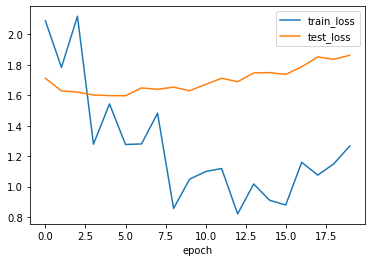

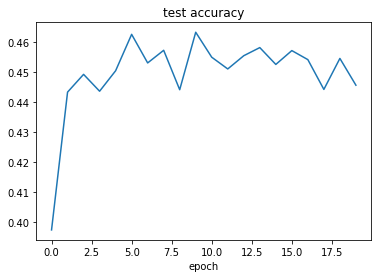

In [72]:
print(num_epoch)
print(history)
plt.figure()
plt.plot(range(len(history['train_loss'])), history['train_loss'], label='train_loss')
plt.plot(range(len(history['test_loss'])), history['test_loss'], label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('loss.png')

plt.figure()
plt.plot(range(len(history['test_acc'])), history['test_acc'])
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('test_acc.png')